## Instituto Politécnico de Coimbra
## Instituto Superior de Engenharia de Coimbra
## Mestrado em Engenharia Informática - Machine Learning
## Elaborado por:

# André Proença 2016018783

# Isabel Castro ....

## DATA SET ORIGINAL
## [https://archive.ics.uci.edu/ml/datasets/Bank+Marketing](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

In [726]:
import seaborn as sea
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [727]:
dados_orig = pd.read_csv('bank-full.csv', sep = ';')

# ----------------------ANALISAR MISSING VALUES E LINHAS DUPLICADAS ----------------------------


In [728]:
dados_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [729]:
#Ver missing values
dados_orig.count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
y            45211
dtype: int64

In [730]:
#Identificar se há null values no dataset
dados_orig.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [731]:
#Identificar se há Nan values no dataset
dados_orig.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [732]:
#Identificar possiveis valores duplicados no dataset
print(dados_orig.duplicated().sum())

0


# ------------------------------------- ANALISAR O NOSSO TARGET --------------------------------------------


In [733]:
X = dados_orig.drop('y',axis=1)
Y = dados_orig['y']

In [734]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='majority',random_state=1)
x_dados , y_dados = rus.fit_resample(X,Y)

In [735]:
y_dados = y_dados.reset_index()
y_dados.drop('index', axis=1, inplace=True)

In [736]:
dados = pd.concat([x_dados,y_dados],axis=1)

Text(0.5, 1.0, 'Target Yes and No')

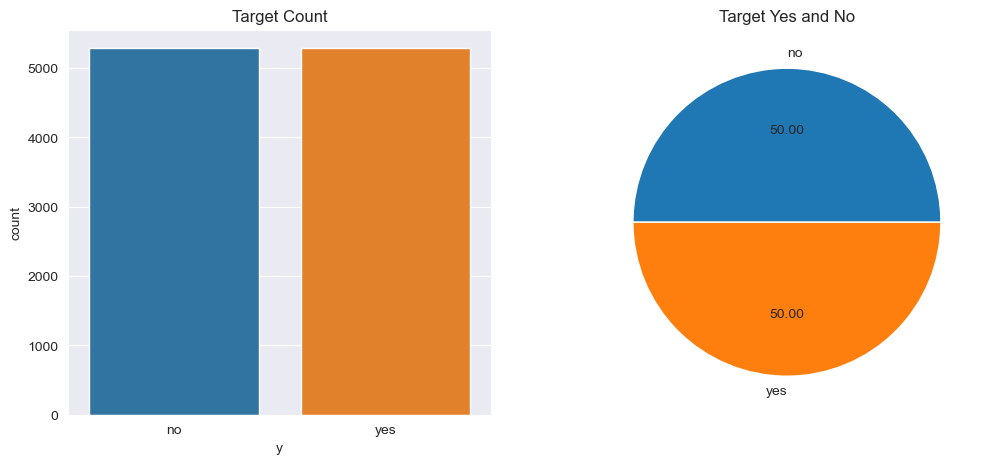

In [737]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sea.countplot(data=y_dados, x='y')
plt.title('Target Count')
plt.subplot(1,2,2)
labels = y_dados['y'].value_counts(sort=True).index
sizes = y_dados['y'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Target Yes and No')

In [738]:
y_dados.y.value_counts()

no     5289
yes    5289
Name: y, dtype: int64

Text(0.5, 1.0, 'Target Yes and No')

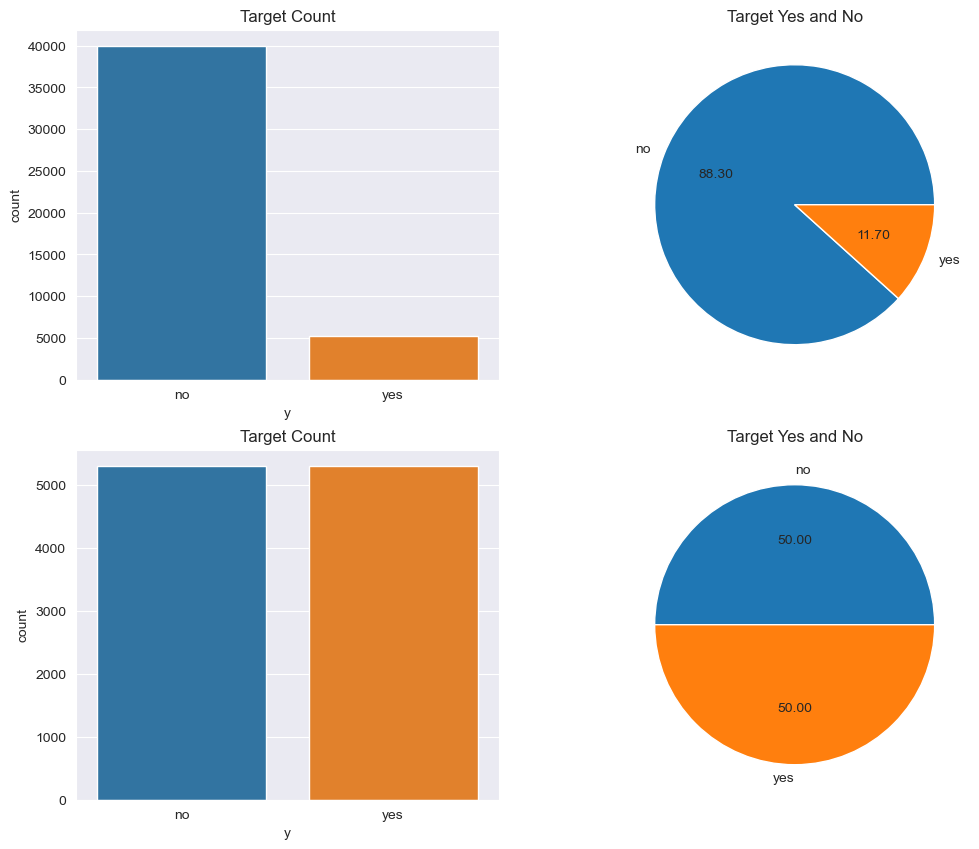

In [739]:
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
sea.countplot(data=dados_orig, x='y')
plt.title('Target Count')
plt.subplot(2,2,2)
labels = dados_orig['y'].value_counts(sort=True).index
sizes = dados_orig['y'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Target Yes and No')
plt.subplot(2,2,3)
sea.countplot(data=y_dados, x='y')
plt.title('Target Count')
plt.subplot(2,2,4)
labels = y_dados['y'].value_counts(sort=True).index
sizes = y_dados['y'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Target Yes and No')

# --------------------------------------- ANALISAR OS DADOS CATEGORICOS --------------------------------

In [740]:
x_dados.job.value_counts()

management       2369
blue-collar      1956
technician       1728
admin.           1266
services          837
retired           744
student           367
self-employed     364
unemployed        354
entrepreneur      286
housemaid         237
unknown            70
Name: job, dtype: int64

Text(0.5, 1.0, 'Percentual de cada tipo de Emprego')

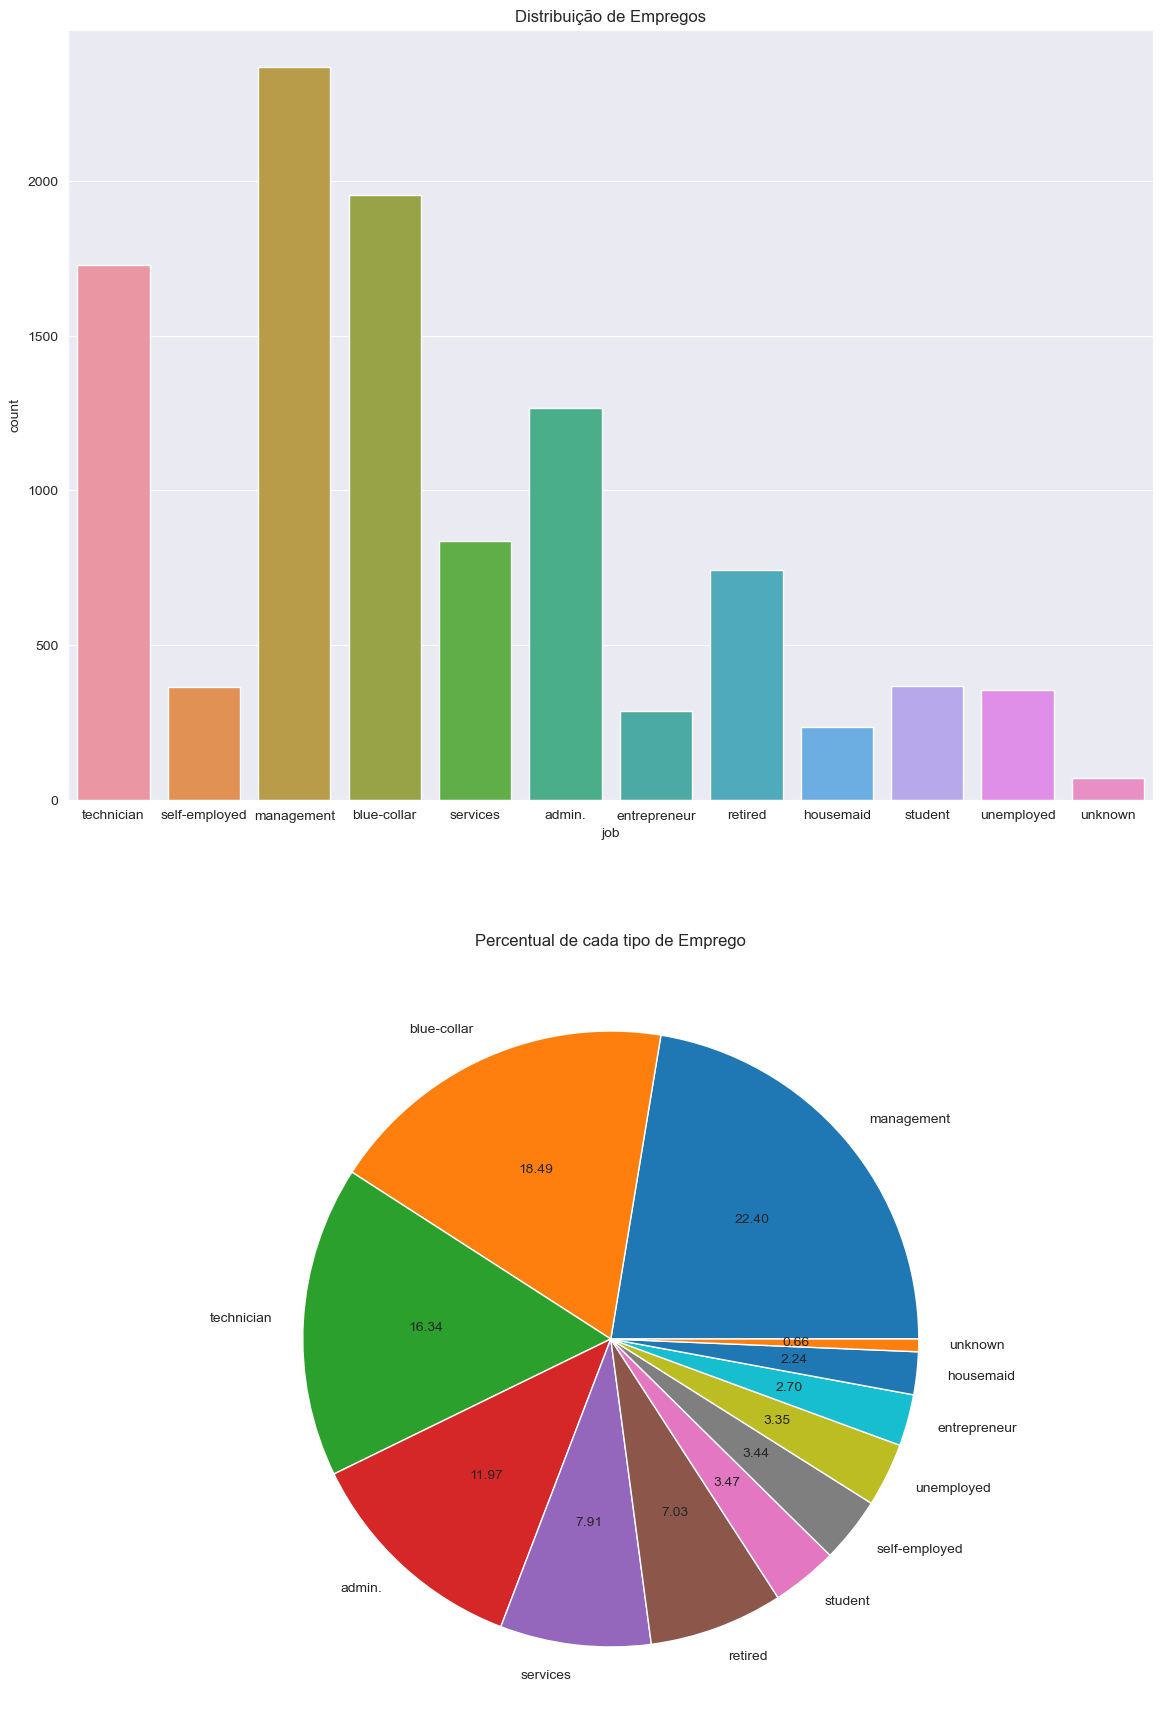

In [741]:
#Vizualizacao da distribuição de empregos plt pie e sea count plot
plt.figure(figsize = (14,22))
plt.subplot(2,1,1)
sea.countplot(data=x_dados, x='job')
plt.title('Distribuição de Empregos')
plt.subplot(2,1,2)
labels = x_dados['job'].value_counts(sort=True).index
sizes= x_dados['job'].value_counts(sort=True)
plt.pie(sizes,labels=labels, autopct='%.2f')
plt.title('Percentual de cada tipo de Emprego')

In [742]:
x_dados.marital.value_counts()

married     5994
single      3370
divorced    1214
Name: marital, dtype: int64

Text(0.5, 1.0, 'Percentual de cada tipo de estado civil')

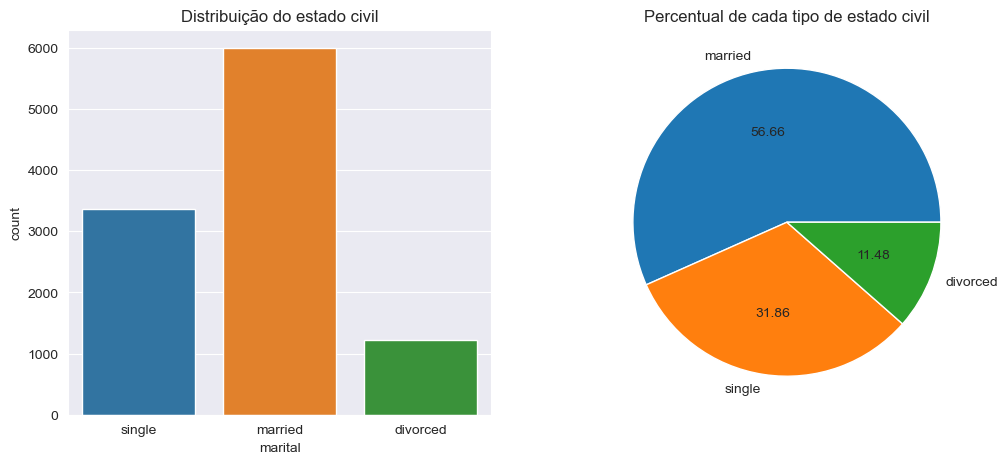

In [743]:
#Vizualizacao do estado civil plt pie e sea count plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sea.countplot(data=x_dados, x='marital')
plt.title('Distribuição do estado civil')
plt.subplot(1,2,2)
labels=x_dados['marital'].value_counts(sort=True).index
sizes=x_dados['marital'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Percentual de cada tipo de estado civil')

In [744]:
x_dados.education.value_counts()

secondary    5209
tertiary     3448
primary      1436
unknown       485
Name: education, dtype: int64

Text(0.5, 1.0, 'Percentual de cada tipo de Educação')

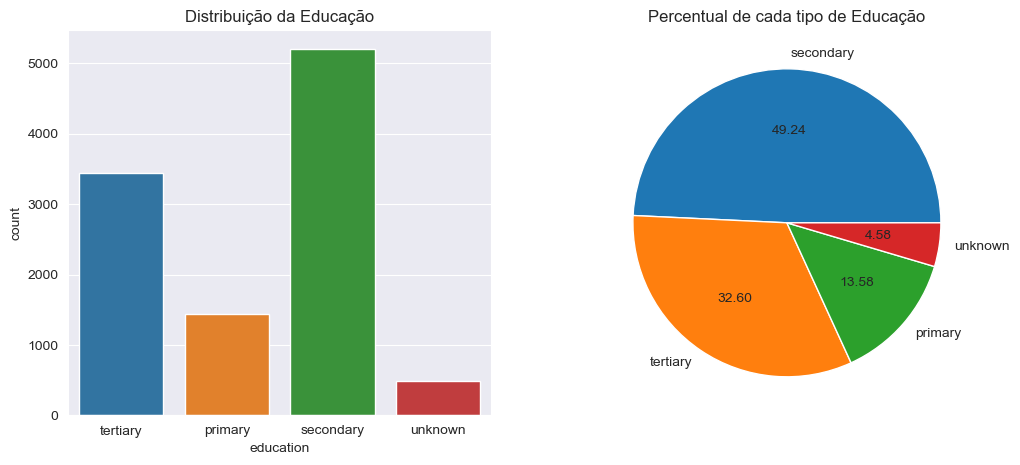

In [745]:
#Vizualizacao distribuicao da educação
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sea.countplot(data=x_dados, x='education')
plt.title('Distribuição da Educação')
plt.subplot(1,2,2)
labels=x_dados['education'].value_counts(sort=True).index
sizes=x_dados['education'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Percentual de cada tipo de Educação')

In [746]:
x_dados.housing.value_counts()

no     5619
yes    4959
Name: housing, dtype: int64

Text(0.5, 1.0, 'Credito a habitaçao')

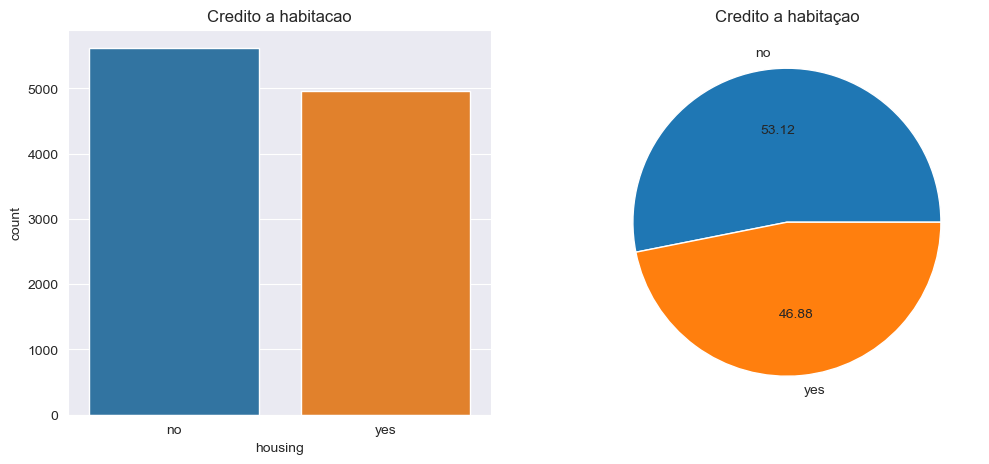

In [747]:
#Vizualizacao house loan plt pie
plt.figure(figsize =(12,5))
plt.subplot(1,2,1)
sea.countplot(data=x_dados, x='housing')
plt.title('Credito a habitacao')
plt.subplot(1,2,2)
labels=x_dados['housing'].value_counts(sort=True).index
sizes=x_dados['housing'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Credito a habitaçao')

In [748]:
x_dados.loan.value_counts()

no     9223
yes    1355
Name: loan, dtype: int64

Text(0.5, 1.0, 'Credito ao Consumo')

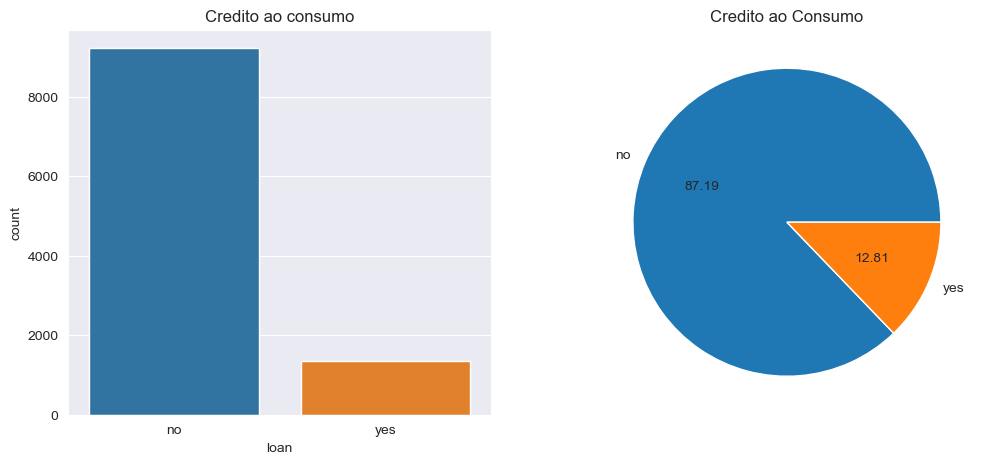

In [749]:
#Vizualizacao loan plt pie e seacount plt
plt.figure(figsize =(12,5))
plt.subplot(1,2,1)
sea.countplot(data=x_dados, x='loan')
plt.title('Credito ao consumo')
plt.subplot(1,2,2)
labels=x_dados['loan'].value_counts(sort=True).index
sizes=x_dados['loan'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Credito ao Consumo')

In [750]:
x_dados.contact.value_counts()

cellular     7633
unknown      2220
telephone     725
Name: contact, dtype: int64

Text(0.5, 1.0, 'Tipo de contacto feito')

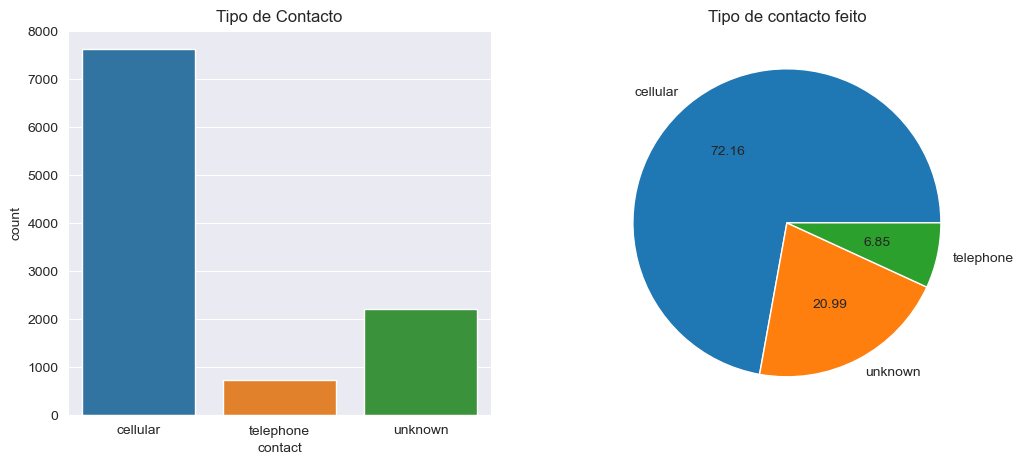

In [751]:
#Vizualizacao loan plt pie e seacount plt
##MUDAR AS CORES OU MUDAR A ORDEM DO X DO SEAPLT COUNT
plt.figure(figsize =(12,5))
plt.subplot(1,2,1)
sea.countplot(data=x_dados, x='contact')
plt.title('Tipo de Contacto')
plt.subplot(1,2,2)
labels=x_dados['contact'].value_counts(sort=True).index
sizes=x_dados['contact'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Tipo de contacto feito')

Text(0.5, 1.0, 'Sucesso da ultima campanha')

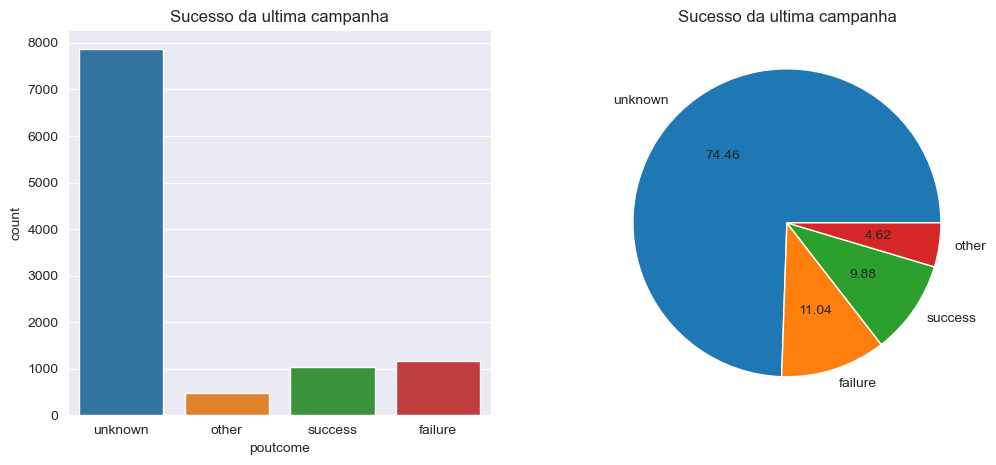

In [752]:
#Vizualizacao do sucesso da ultima campanha plt pie e seacount plt
plt.figure(figsize =(12,5))
plt.subplot(1,2,1)
sea.countplot(data=x_dados, x='poutcome')
plt.title('Sucesso da ultima campanha')
plt.subplot(1,2,2)
labels=x_dados['poutcome'].value_counts(sort=True).index
sizes=x_dados['poutcome'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Sucesso da ultima campanha')

Text(0.5, 1.0, 'Ultimo mes de contacto desta campanha')

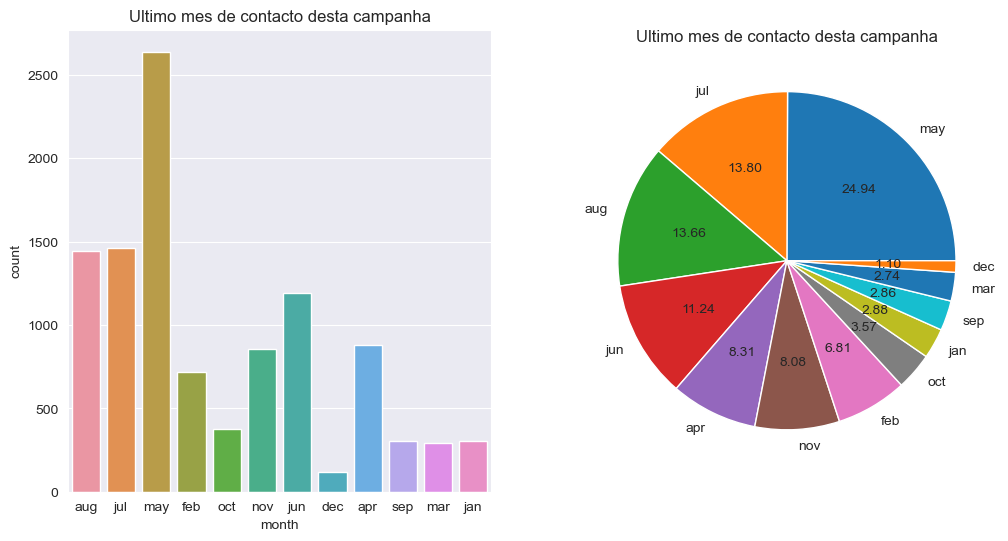

In [753]:
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)
sea.countplot(data=x_dados, x='month')
plt.title('Ultimo mes de contacto desta campanha')
plt.subplot(1,2,2)
labels=x_dados['month'].value_counts(sort=True).index
sizes=x_dados['month'].value_counts(sort=True)
plt.pie(sizes,labels=labels,autopct='%.2f')
plt.title('Ultimo mes de contacto desta campanha')

# ------ ANALISAR OS NOSSOS DADOS CATEGORICOS COM O TARGET ----------

In [754]:
#Separar os dados Categoricos
dados_cat = dados.select_dtypes(include='object').columns.drop(["y","job"])

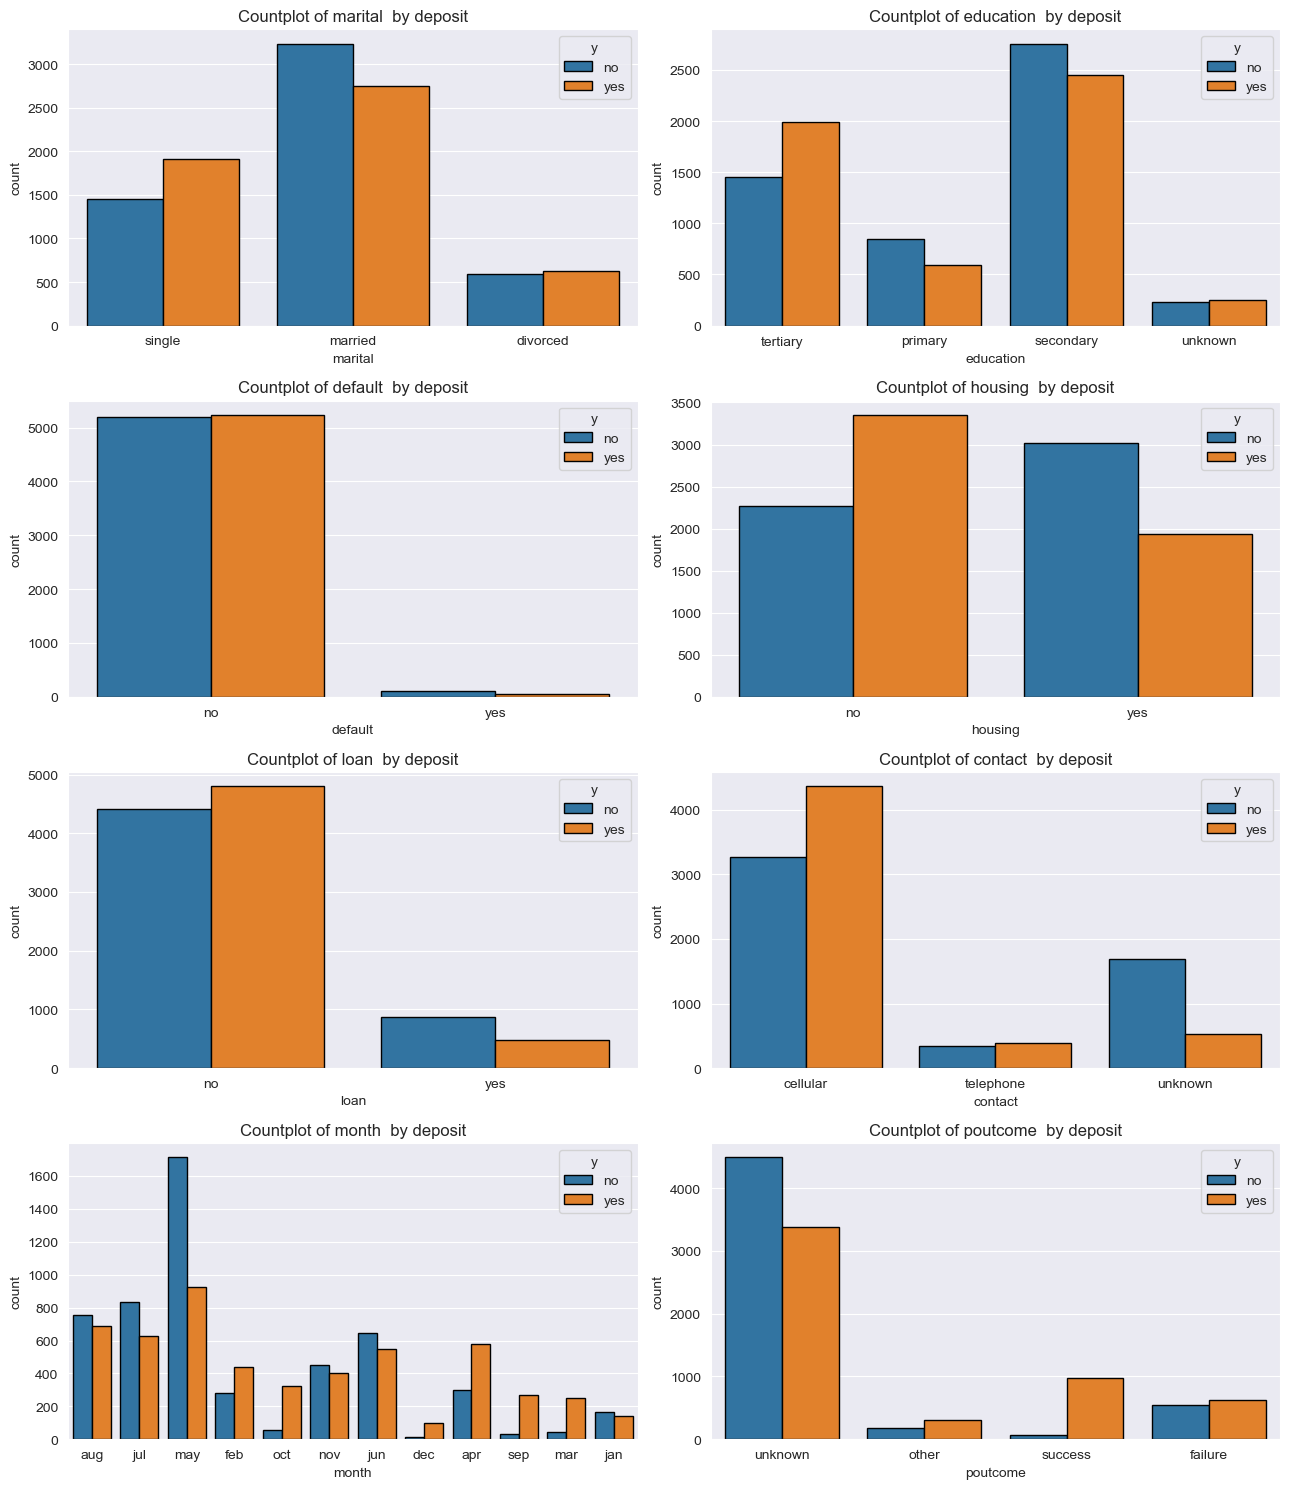

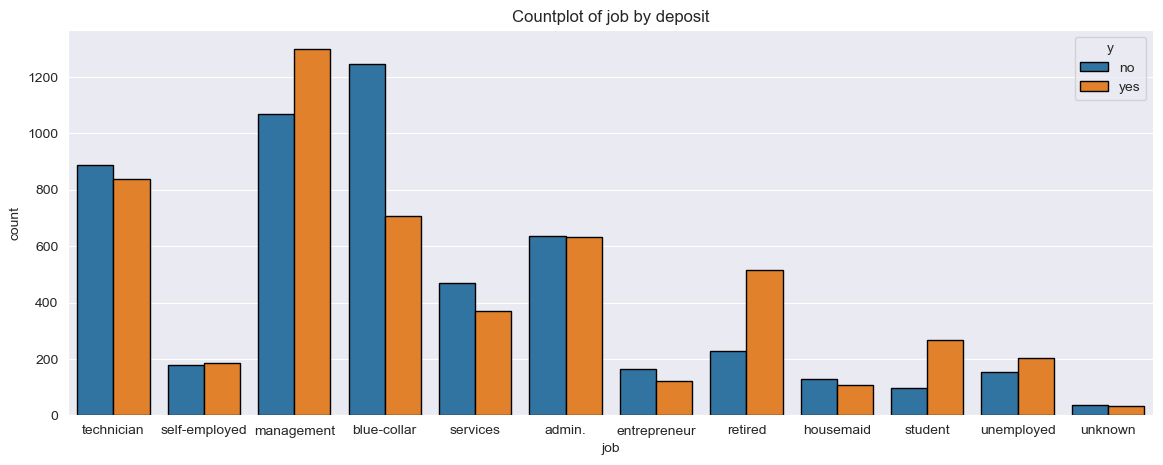

In [755]:

# Analisar o target pelos elementos categoricos por segment plots e histplots
plt.figure(figsize=(13,15))
for i,dados_cate in enumerate(dados_cat):
    plt.subplot(4,2,i+1)
    sea.countplot(x=dados_cate,hue='y',data=dados,edgecolor="black")
    plt.title("Countplot of {}  by deposit".format(dados_cate))
plt.tight_layout()
plt.show()
plt.figure(figsize=[14,5])
sea.countplot(x='job', hue='y',edgecolor="black",data=dados)
plt.title("Countplot of job by deposit")
plt.show()

In [756]:
#Analisar dados Numericos
dados.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000
mean,41.164303,1582.107109,15.551522,378.233598,2.497353,51.593023,0.807336
std,11.972260,3461.295557,8.411188,349.133893,2.615877,108.502627,2.155428
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,127.000000,8.000000,143.000000,1.000000,-1.000000,0.000000
50%,38.000000,570.500000,15.000000,259.000000,2.000000,-1.000000,0.000000
75%,49.000000,1765.000000,21.000000,508.000000,3.000000,40.000000,1.000000
max,95.000000,102127.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


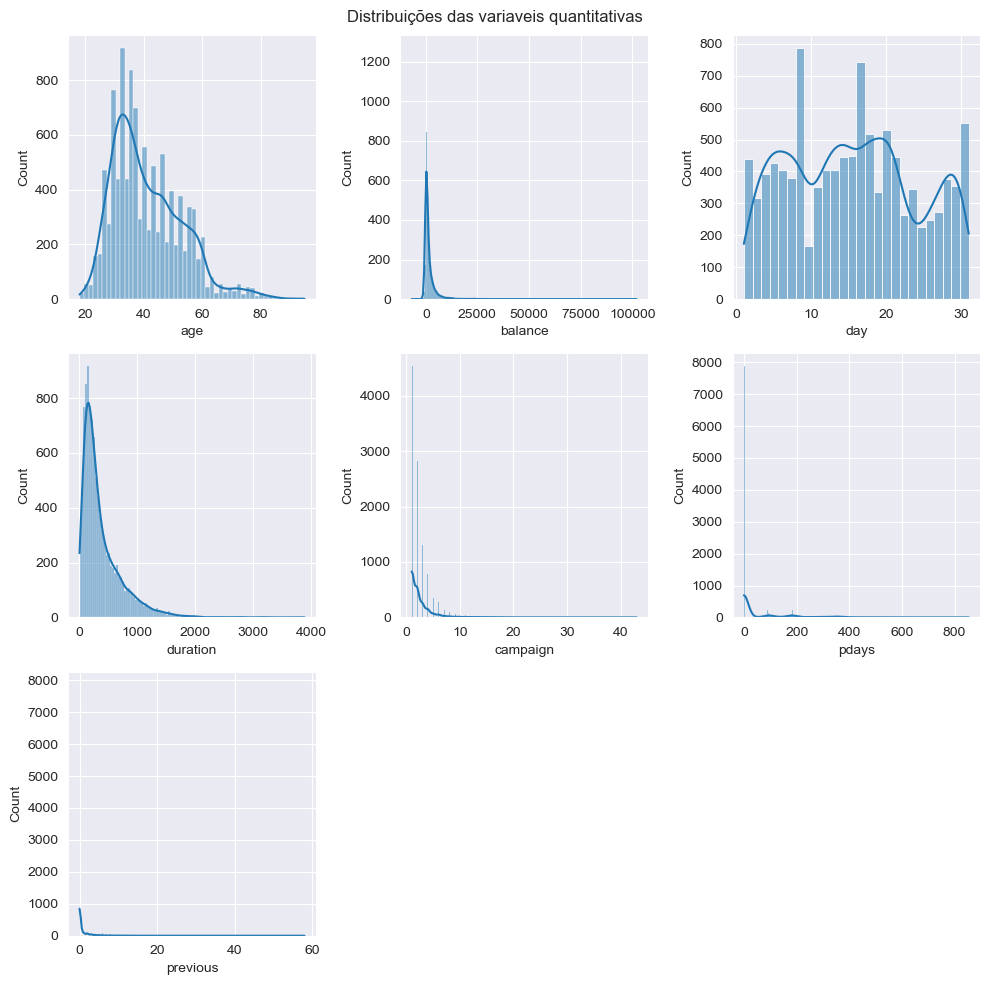

In [757]:
# Distribuicoes dos dados quatitativos
plt.figure(figsize=(10,10))

for i, col in enumerate(dados.select_dtypes(include=['int64']).columns):
    ax = plt.subplot(3,3, i+1)
    sea.histplot(x = dados[col], ax=ax, kde = True)

plt.suptitle('Distribuições das variaveis quantitativas')
plt.tight_layout()

Text(0.5, 1.0, 'Distribuição do numero médio de contactos antes desta campanha para um cliente')

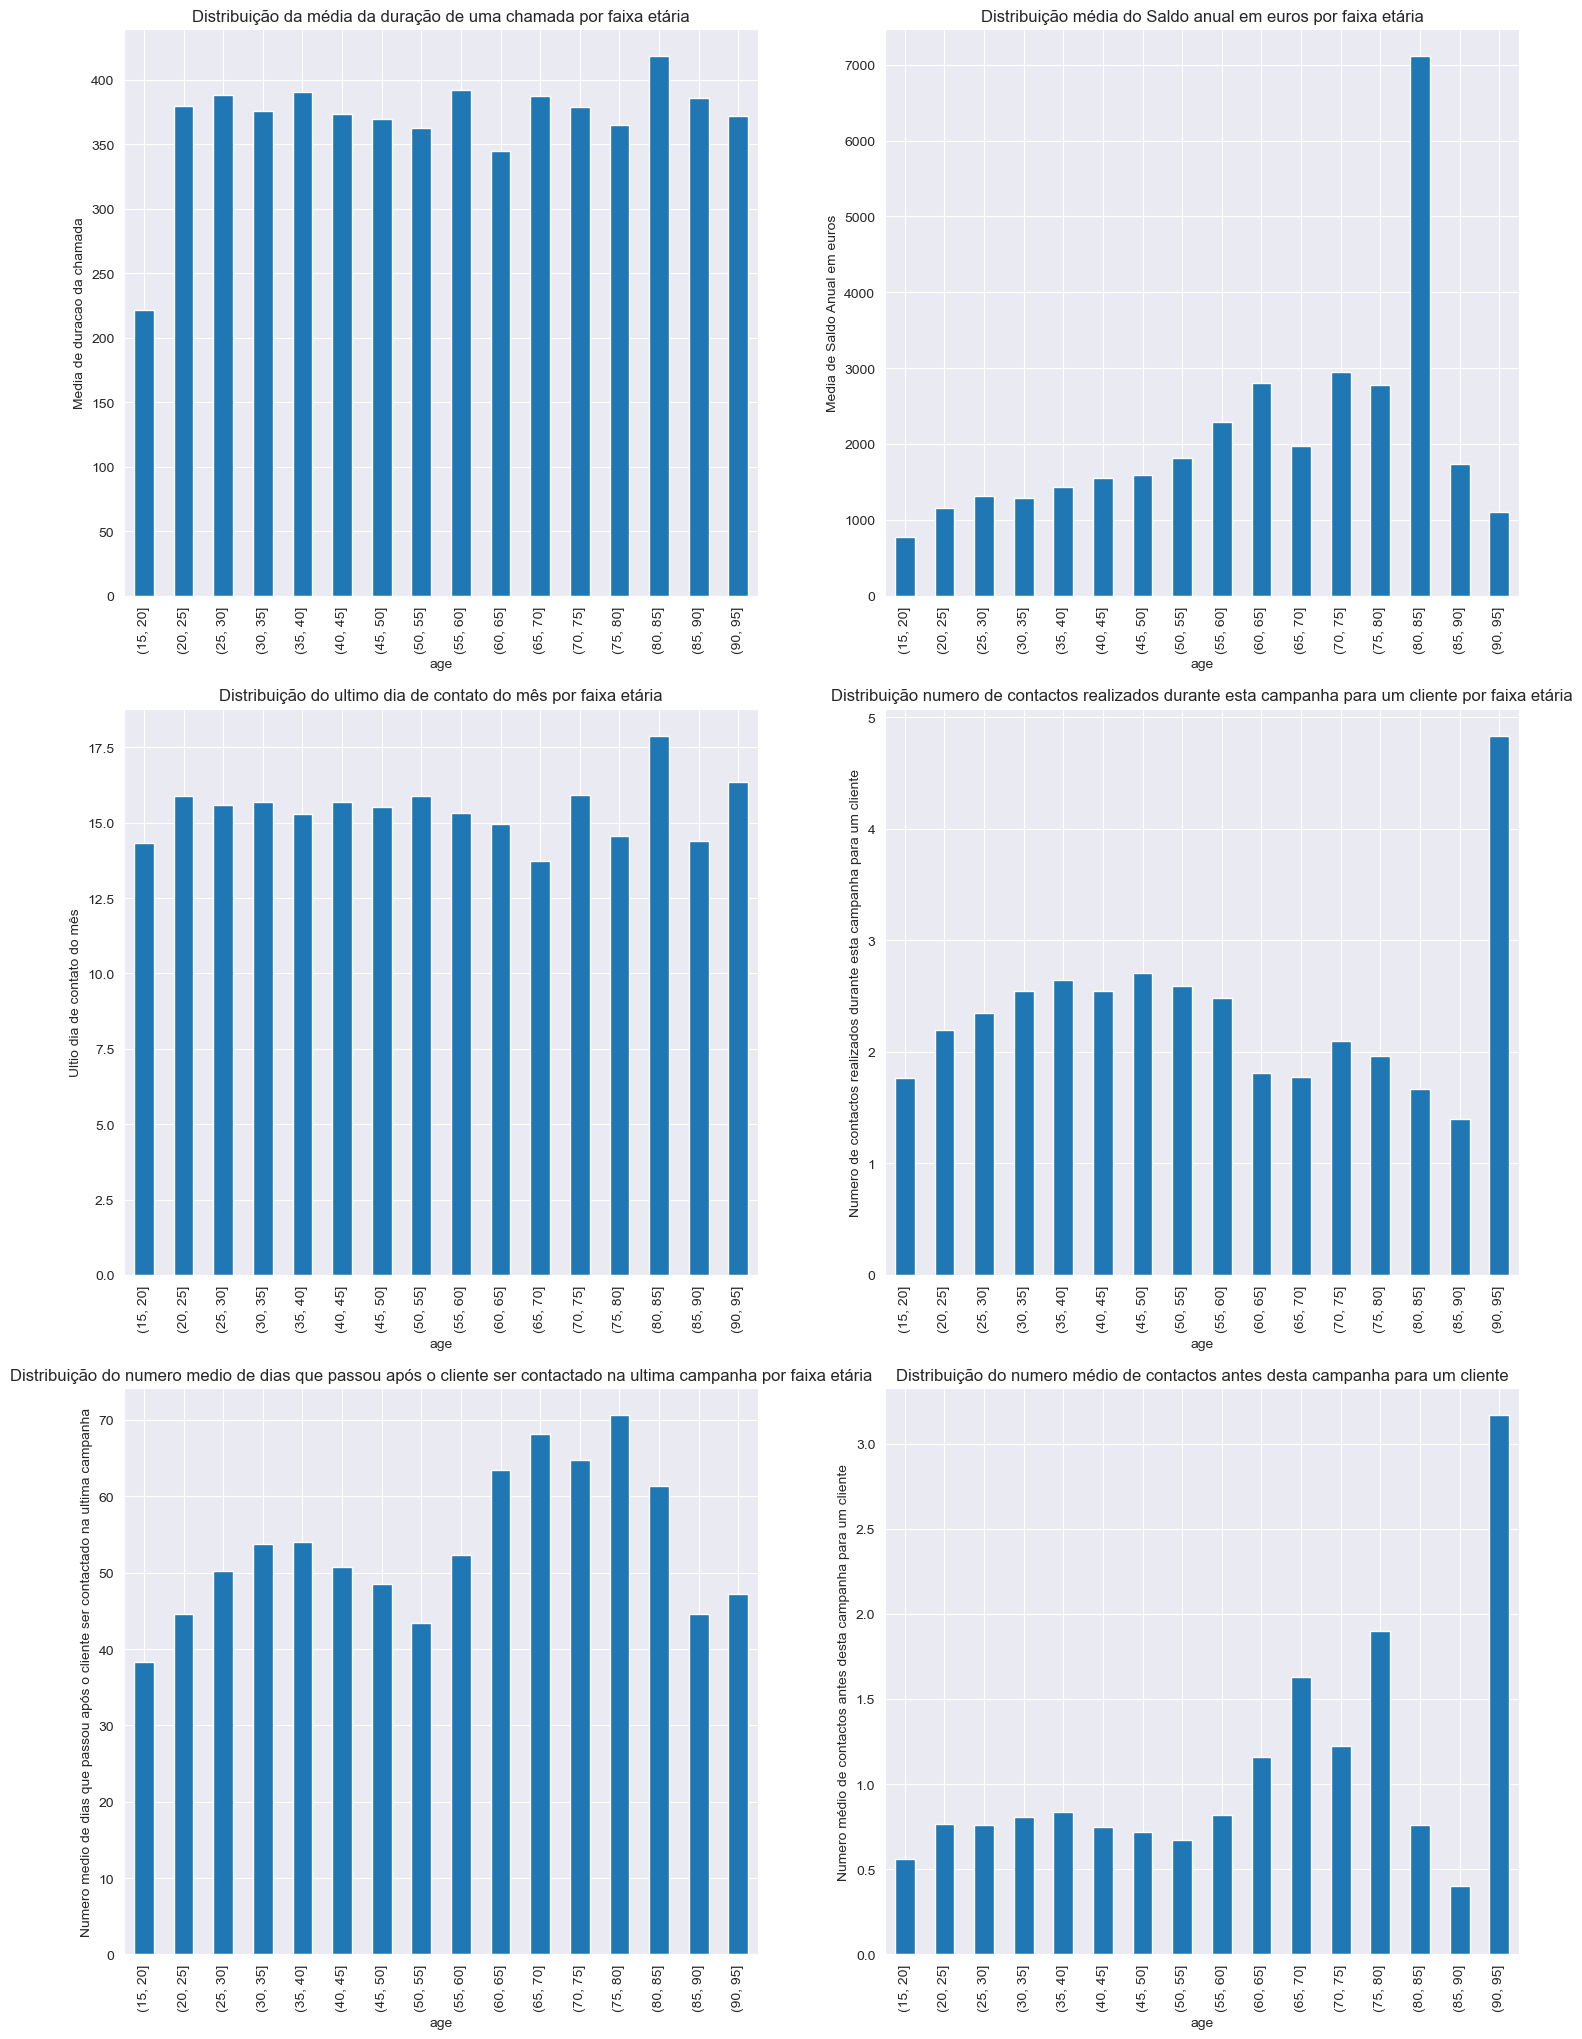

In [758]:
#Vizualização das variaveis numericas por faixa etária
#Vamos fazer distribuições de 5 em 5 anos
plt.figure(figsize=(18,25))
plt.subplot(3,2,1)
faixaidades=[15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95]
duracao_chamada_idades = dados.groupby(pd.cut(dados.age,faixaidades)).duration.mean().plot.bar()
plt.ylabel('Media de duracao da chamada')
plt.title('Distribuição da média da duração de uma chamada por faixa etária')
plt.subplot(3,2,2)
avg_balance_idades = dados.groupby(pd.cut(dados.age,faixaidades)).balance.mean().plot.bar()
plt.ylabel('Media de Saldo Anual em euros')
plt.title('Distribuição média do Saldo anual em euros por faixa etária')
plt.subplot(3,2,3)
##Ver melhor!!
last_day_month_contact_idades = dados.groupby(pd.cut(dados.age,faixaidades)).day.mean().plot.bar()
plt.ylabel('Ultio dia de contato do mês')
plt.title('Distribuição do ultimo dia de contato do mês por faixa etária')
plt.subplot(3,2,4)
campaign_contact_per_client_idades = dados.groupby(pd.cut(dados.age,faixaidades)).campaign.mean().plot.bar()
plt.ylabel('Numero de contactos realizados durante esta campanha para um cliente')
plt.title('Distribuição numero de contactos realizados durante esta campanha para um cliente por faixa etária')
plt.subplot(3,2,5)
campaign_contact_per_client_afterlastcampaign_idades = dados.groupby(pd.cut(dados.age,faixaidades)).pdays.mean().plot.bar()
plt.ylabel('Numero medio de dias que passou após o cliente ser contactado na ultima campanha')
plt.title('Distribuição do numero medio de dias que passou após o cliente ser contactado na ultima campanha por faixa etária')
plt.subplot(3,2,6)
number_contacts_beforethiscampaign_idades = dados.groupby(pd.cut(dados.age,faixaidades)).previous.mean().plot.bar()
plt.ylabel('Numero médio de contactos antes desta campanha para um cliente')
plt.title('Distribuição do numero médio de contactos antes desta campanha para um cliente')

0 age
1 balance
2 day
3 duration
4 campaign
5 pdays
6 previous


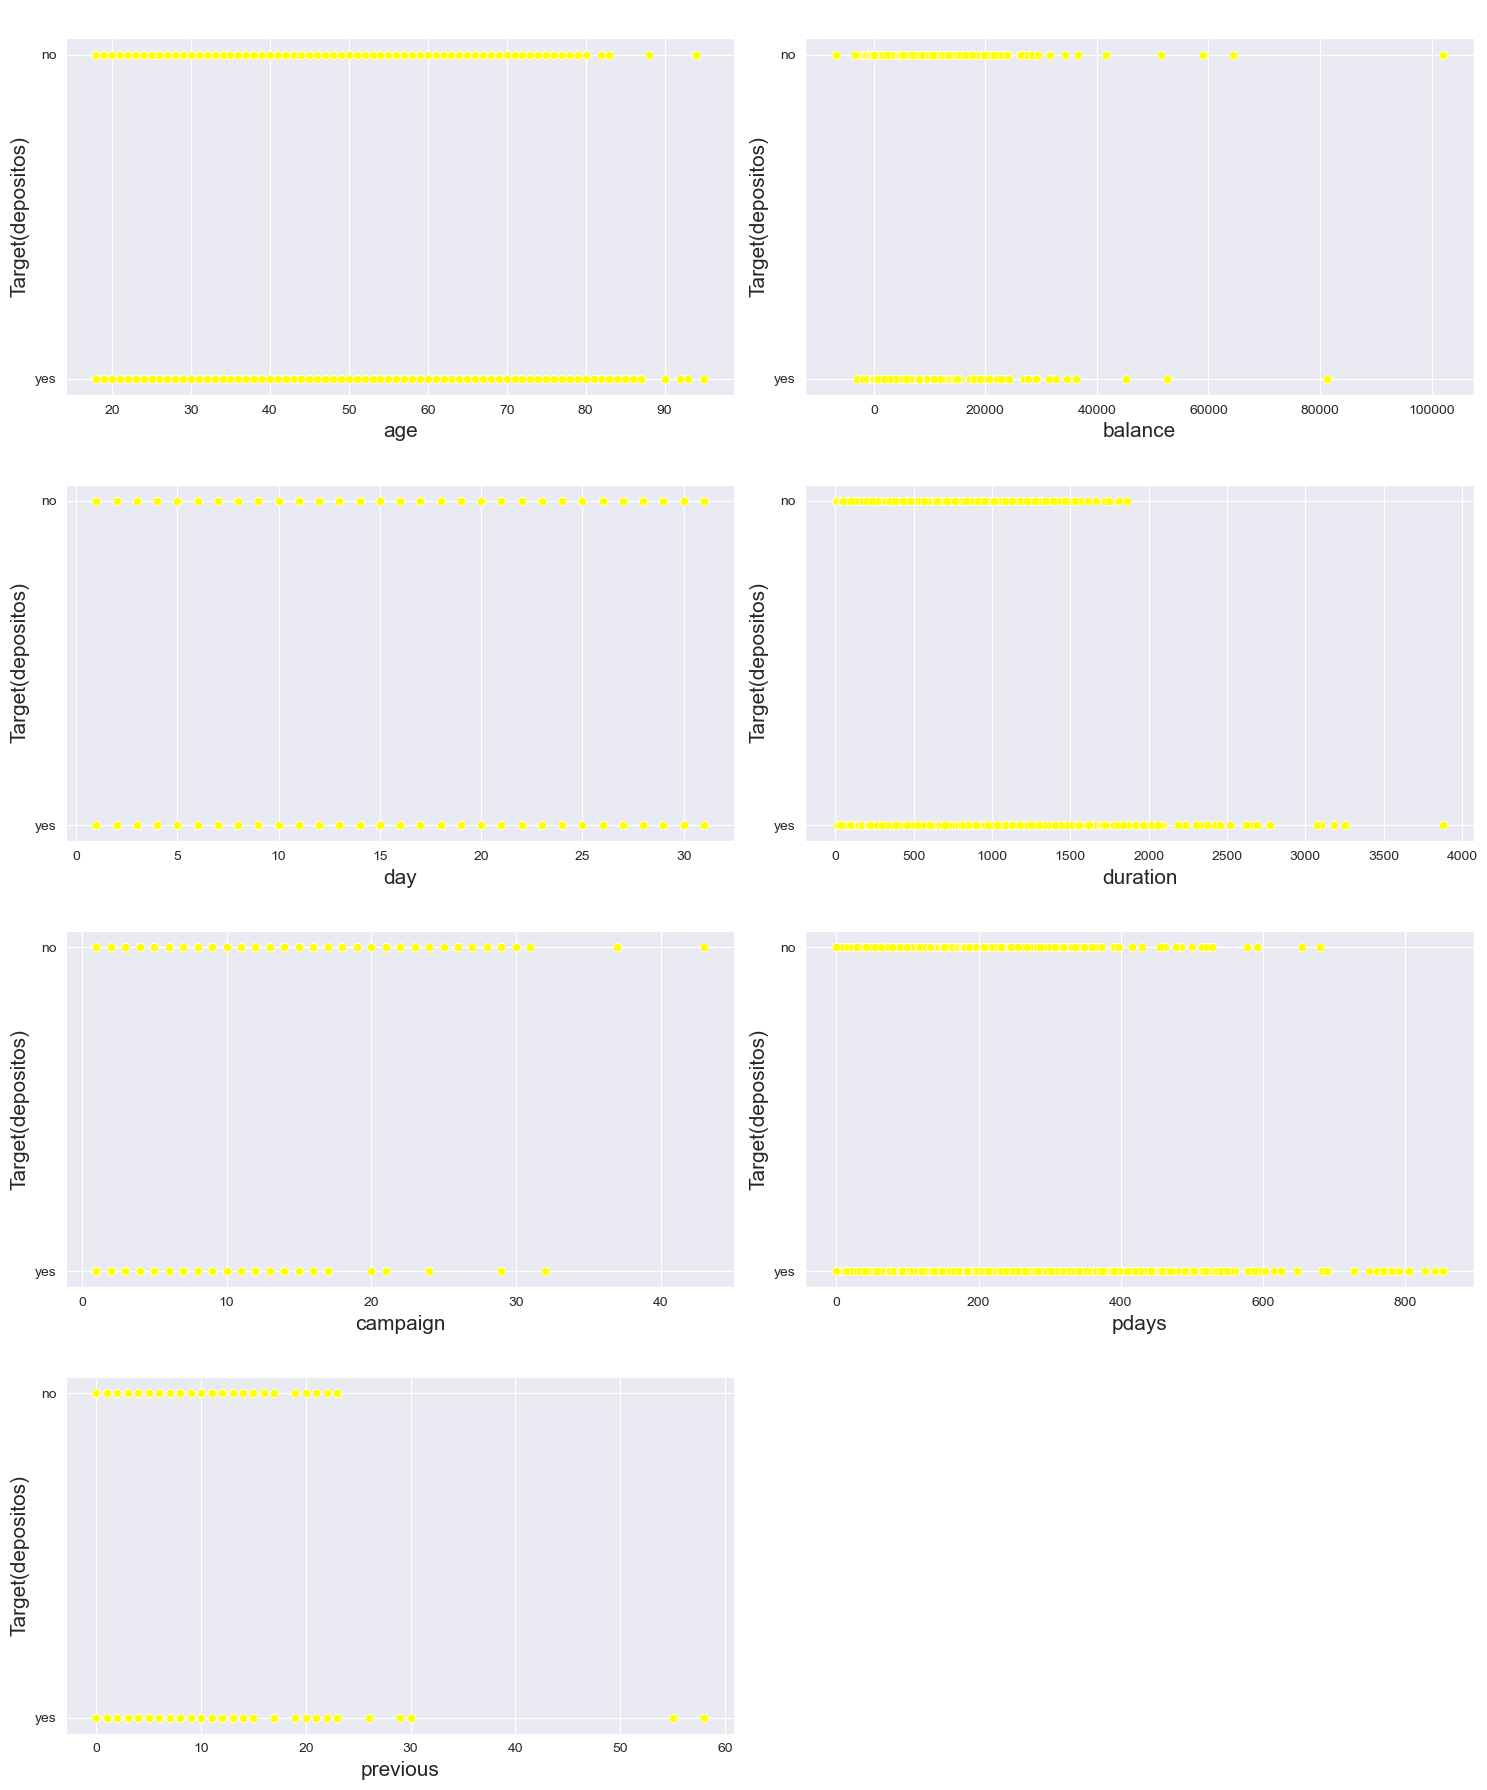

In [759]:
# SCATTER PLOTS PARA OS DADOS NUMERICOS EM FUNCAO DO TARGET

dados_num = dados[['age','balance','day','duration','campaign','pdays','previous','y']]
cols = ['age','balance','day','duration','campaign','pdays','previous']
plt.figure(figsize=(15,18))
for i, dados_numericos in enumerate(cols):
    print(i,dados_numericos)
    plt.subplot(4,2,i+1)
    sea.scatterplot(x=dados_numericos, y='y', data=dados_num, color='yellow')
    plt.title("scatterplot of {} by target(depositos)".format(dados_numericos), size=20, color="white")
    plt.xlabel("{}".format(dados_numericos),size=15)
    plt.ylabel("Target(depositos)",size=15)
plt.tight_layout()

In [760]:
dados.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.116612,-0.010604,-0.004690,-0.010193,0.011429,0.032662
balance,0.116612,1.000000,0.000799,0.008379,-0.018188,0.015663,0.036901
day,-0.010604,0.000799,1.000000,-0.007536,0.133088,-0.070724,-0.062402
duration,-0.004690,0.008379,-0.007536,1.000000,-0.028059,-0.029892,-0.021873
campaign,-0.010193,-0.018188,0.133088,-0.028059,1.000000,-0.106255,-0.062669
pdays,0.011429,0.015663,-0.070724,-0.029892,-0.106255,1.000000,0.508079
previous,0.032662,0.036901,-0.062402,-0.021873,-0.062669,0.508079,1.000000


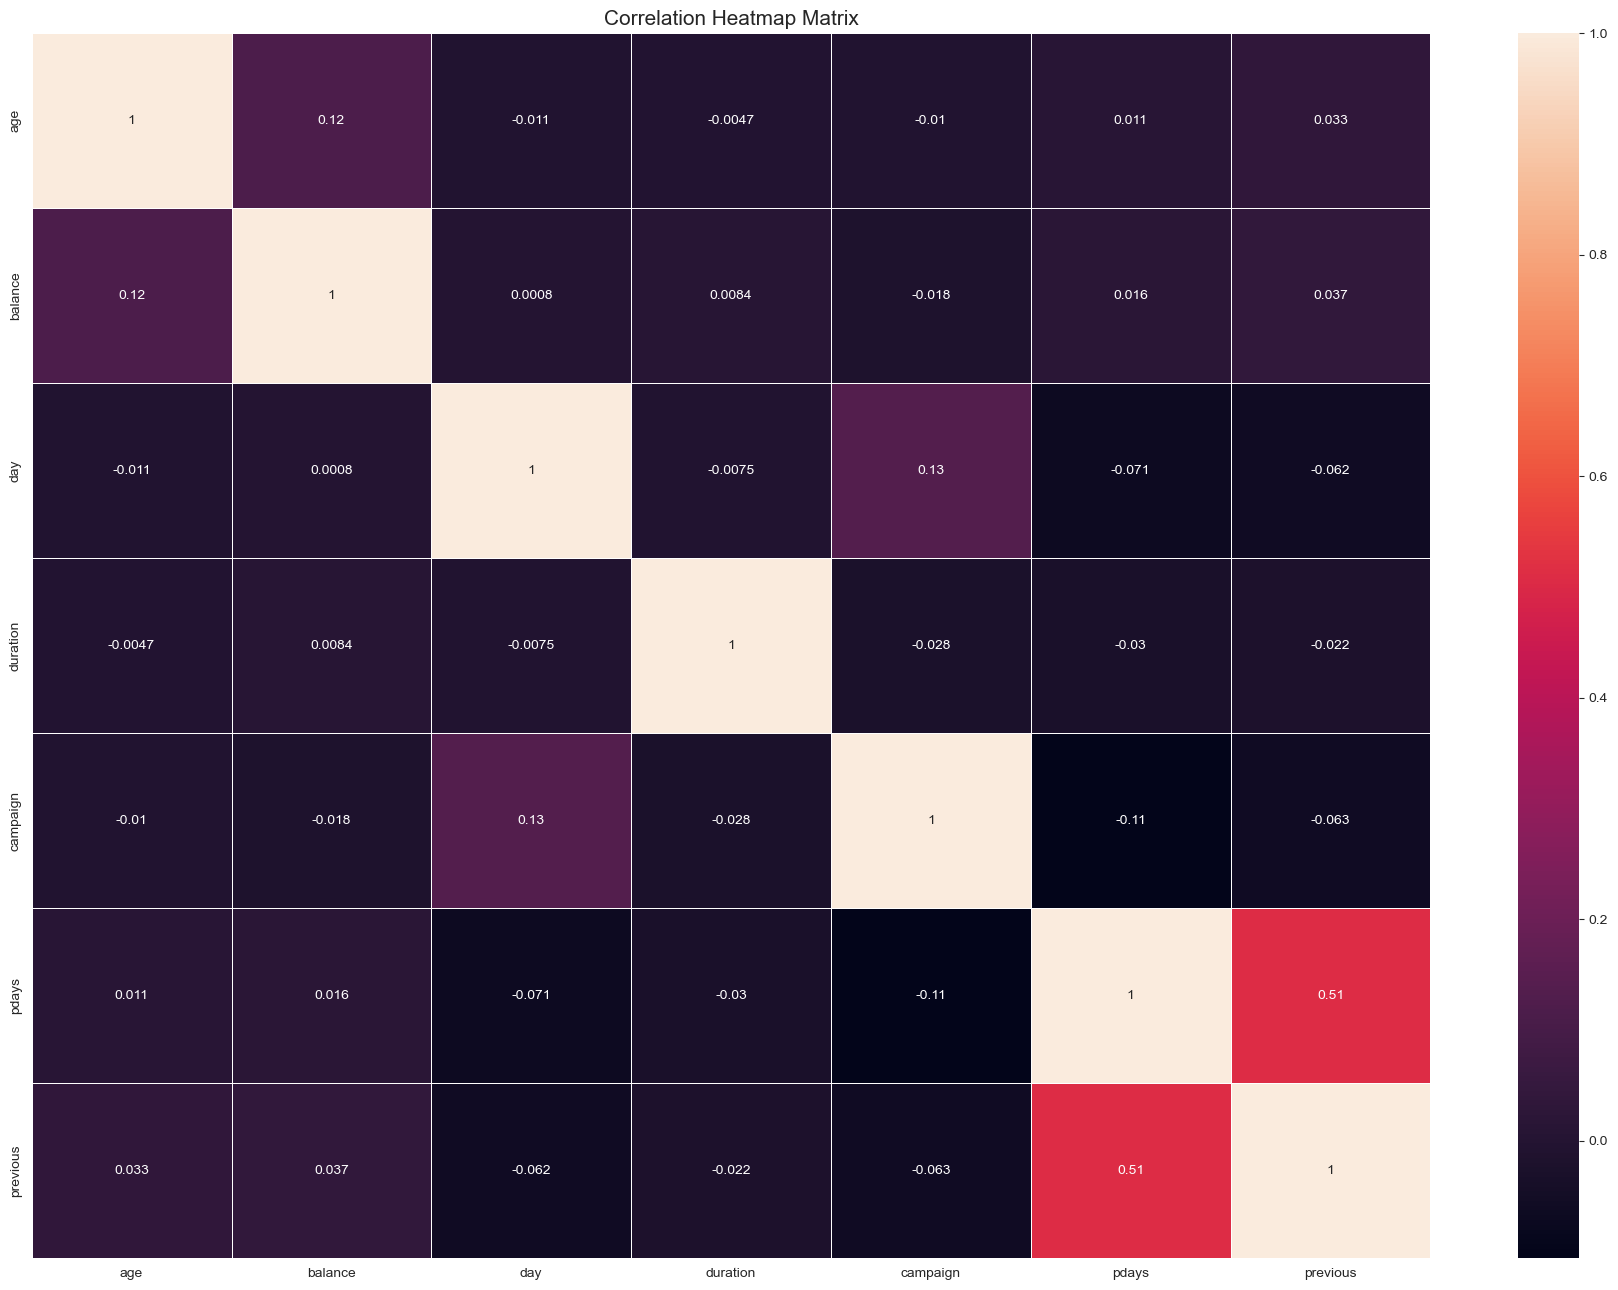

In [761]:
##Matrix de Correlação
plt.subplots(figsize = (18,13))
hmap = sea.heatmap(data = dados.corr(), annot=True , linewidths=0.5)
plt.title("Correlation Heatmap Matrix", fontsize=15)
plt.tight_layout()

# ----------------------------------- DETETAR OUTLIERS -----------------------------

0 age
1 balance
2 day
3 duration
4 campaign
5 pdays
6 previous


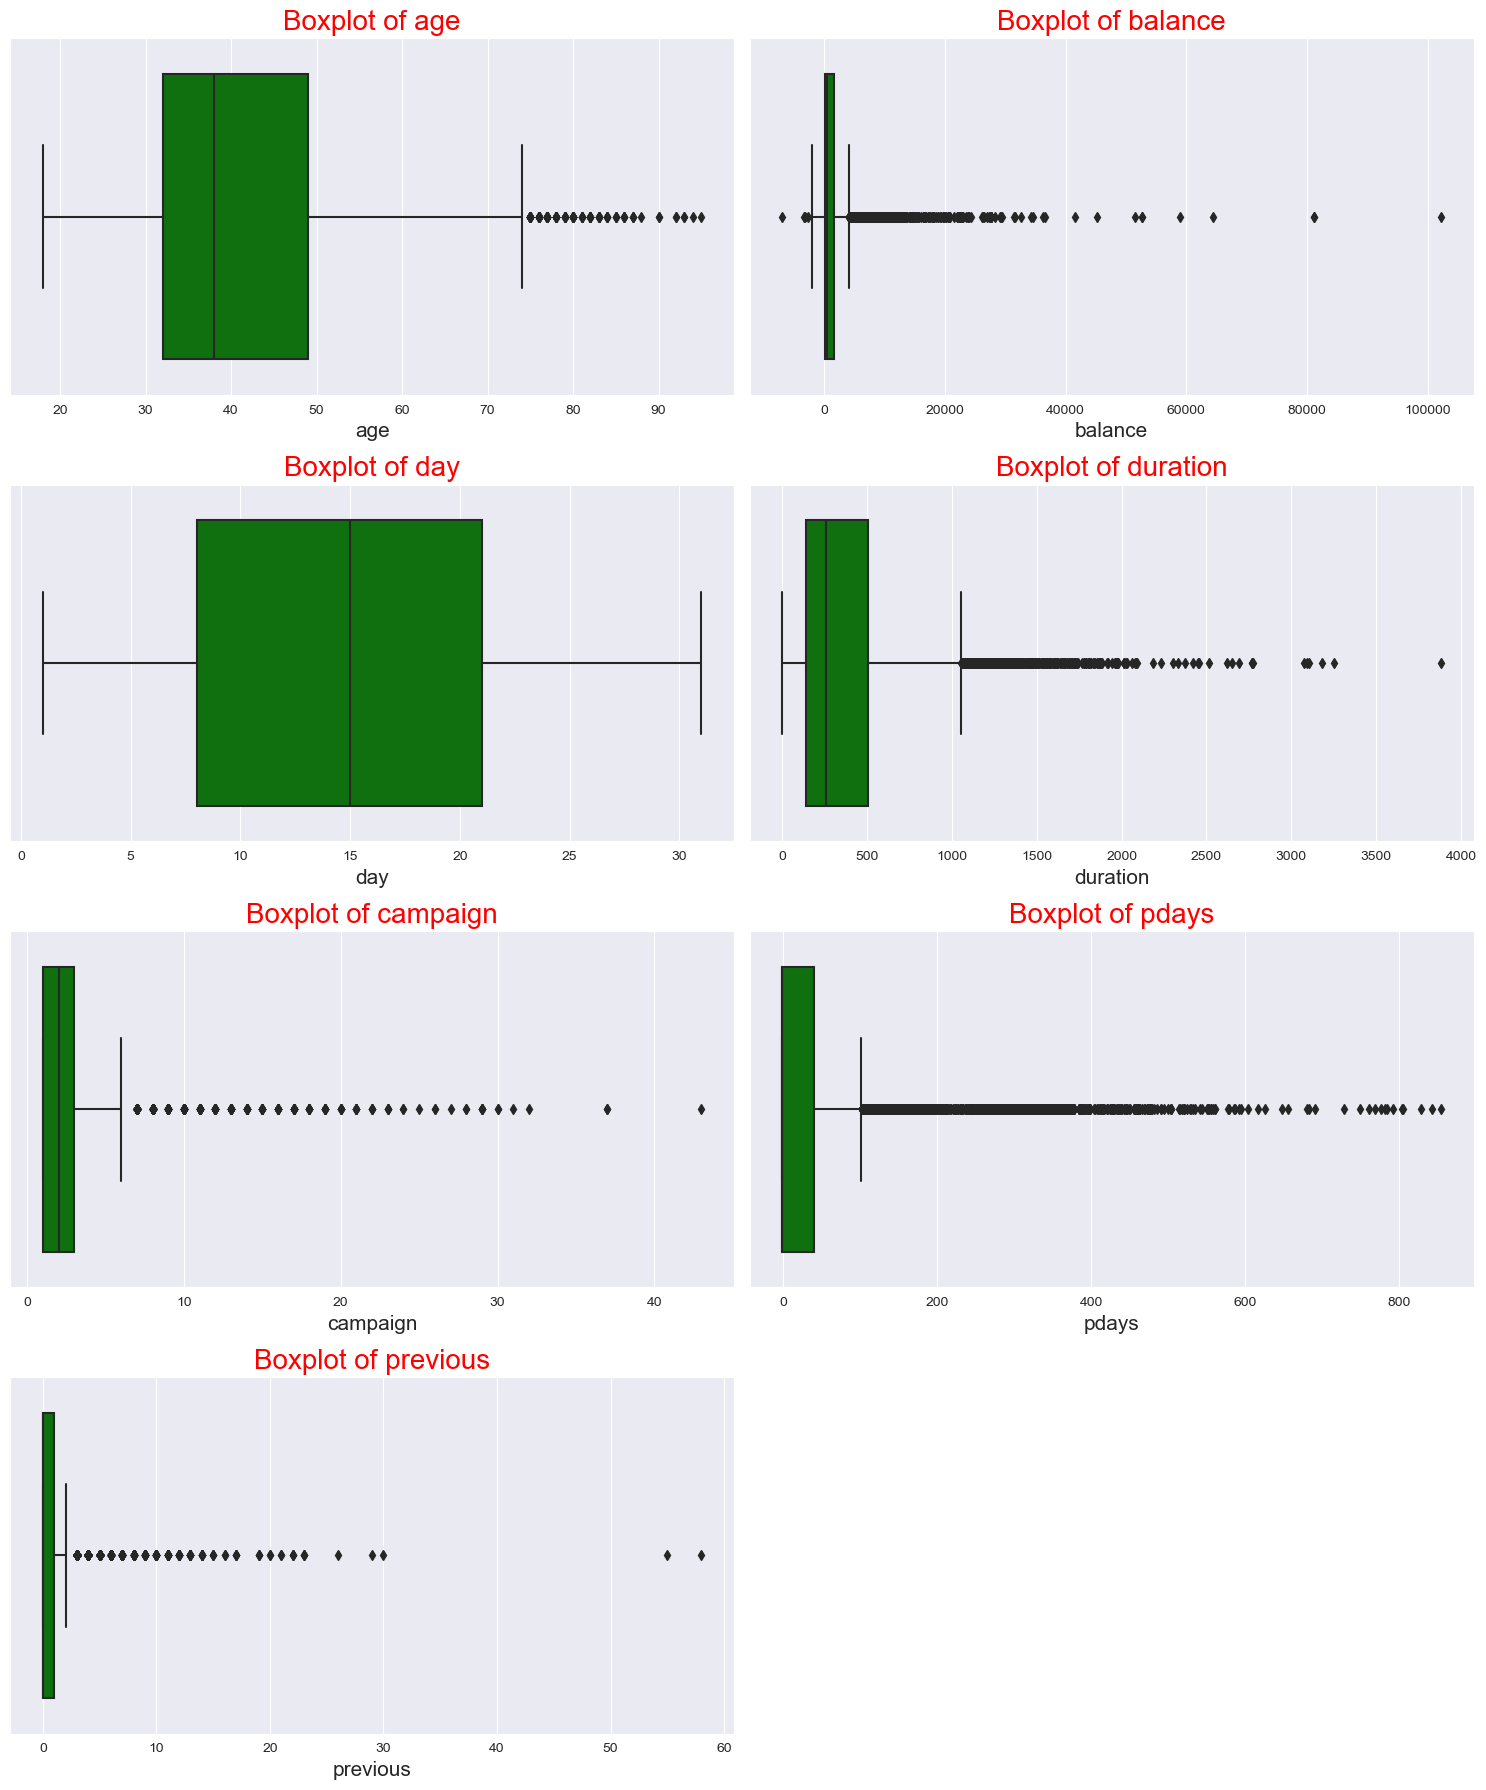

In [762]:
# BOX PLOT PARA OS DADOS NUMERICOS
plt.figure(figsize=(15,18))
for i,dados_numericos in enumerate(cols):
    print(i,dados_numericos)
    plt.subplot(4,2,i+1)
    sea.boxplot(x=dados_numericos,data=dados_num,color='green')
    plt.title("Boxplot of {}".format(dados_numericos),size=20,color="red")
    plt.xlabel("{}".format(dados_numericos),size=15)
plt.tight_layout()

# ------------------------------- TRATAR DOS OUTLIERS -----------------------

In [763]:
# BALANCE
# VAMOS DAR DROP A TODAS AS LINHAS COM BALANCE NEGATIVO E VAMOS TAMBEM DAR DROP A LINHAS COM BALANCE MUITO ALTOS

# DAR DROP DAS LINHAS
dados.drop(dados[(dados['balance']>40000)|(dados['balance']<0)].index,inplace=True,axis=0)

In [764]:
# DURATION
# VAMOS DAR DROP A TODAS AS LINHAS EM QUE A DURACAO DESDE O ULTIMO CONTACTO FOI ACIMA DE 2500 DIAS
dados.drop(dados[dados['duration']>2500].index,inplace=True,axis=0)


In [765]:
# CAMPAIGN
# VAMOS DAR DROP A TODAS AS LINHAS EM QUE O NUMERO DE CONTACTOS FOI ACIMA DE 40
dados.drop(dados[dados['campaign']>40].index,axis=0,inplace=True)

In [766]:
# PDAYS
# VAMOS DAR DROP A TODA A INFORMACAO dos pdays
dados.drop("pdays",inplace=True,axis=1)

In [767]:
# PREVIOUS
dados.drop(dados[dados['previous']>30].index,axis=0,inplace=True)

# --------------------------------- ENCODING CATEGORICAL VALUES ----------------------------

#TIPOS DE Encodinm

#Bianry Encoding PARA OS VALORES binarios 0 e 1


#Ordinal Encoding para atributos ordinais que dao para enumerar

#OneHot Encoding para

#Dummy Encoding igual ao oneHot encoding mas N-1 gerando novas features


# STRATIFIED SAMPLING


In [768]:
dados['housing'].value_counts()/len(dados)

no     0.549661
yes    0.450339
Name: housing, dtype: float64

In [769]:
dados['loan'].value_counts()/len(dados)

no     0.885795
yes    0.114205
Name: loan, dtype: float64

In [770]:
dados['default'].value_counts()/len(dados)

no     0.992812
yes    0.007188
Name: default, dtype: float64

In [771]:
# DIVIDIR O DATA SET EM FEATURES E TARGET
dados = dados.drop('y',axis=1)
dados_target = dados['y']


KeyError: 'y'

In [ ]:
# TEMOS QUE GARANTIR QUE O nosso treino e teste tem +- o mesmo valor de loans
from sklearn.model_selection import train_test_split
dados['binary'] = dados['loan'].astype(str) + dados['default'].astype(str)

x_train_set, x_test_set , y_train, y_test  = train_test_split(dados,dados_target,test_size=0.2, random_state=0, stratify=dados[['binary']])


In [ ]:
# Dar drop a coluna binary porque era auxiliar apenas para fazer o split entre o treino e o teste
x_train_set = x_train_set.drop("binary",axis=1)
x_test_set = x_test_set.drop("binary",axis=1)

In [ ]:
x_train_set['default'].value_counts()/len(x_train_set)

In [ ]:
x_train_set['loan'].value_counts()/len(x_train_set)

In [ ]:
x_test_set['default'].value_counts()/len(x_test_set)

In [ ]:
x_test_set['loan'].value_counts()/len(x_test_set)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse


class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import LabelEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

numerical_pipeline = Pipeline([
    ('select_nume', DataFrameSelector(['age','balance','day','campaign','previous','duration'])),
    ('std_scaler', StandardScaler())
])

dummy_encoding = Pipeline([('dummy_cat_select',DataFrameSelector(['default','housing','loan'])),
                       ('dummy_enc',CategoricalEncoder(encoding='onehot-dense'))])

ordinal_encoding = Pipeline([('ordinal_cat_select', DataFrameSelector(['month','contact','poutcome'])),('ordianl_enc',CategoricalEncoder(encoding='ordinal'))])



preprocess_pipeline = FeatureUnion(transformer_list=[('numerical_pipeline',numerical_pipeline),('dummy_encoding',dummy_encoding),('ordinal_encoding',ordinal_encoding)])
x_train_set = preprocess_pipeline.fit_transform(x_train_set)
x_test_set = preprocess_pipeline.fit_transform(x_test_set)

# ------------------- VERSAO SEM PIPELINE -------------------------

In [ ]:
#Binary Encoding
from sklearn.preprocessing import LabelBinarizer

lista_bin = ['default','housing','loan']
for i in lista_bin:
    dados[i] = LabelBinarizer().fit_transform(dados[i].values)


In [ ]:
#Ordinal Encoding
lista_ordinal=['month','contact','poutcome']
for i in lista_ordinal:
    dados[i]=LabelEncoder().fit_transform(dados[i].values)

In [ ]:
# Dummy Encoding
dados = pd.get_dummies(dados, columns= ['job','marital','education'])

In [ ]:
# Reset Index e ver dados de novo
dados = dados.reset_index()
dados.drop('index', axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

dados['binary'] = dados['loan'].astype(str) + dados['default'].astype(str)

x_train_set_np, x_test_set_np , y_train_set_np, y_test_set_np = train_test_split(dados,dados_target,test_size=0.2, random_state=0, stratify=dados[['binary']])

In [ ]:
#Ja nao precisamos da binary columns
x_train_set_np = x_train_set_np.drop("binary",axis=1)
x_test_set_np = x_test_set_np.drop("binary",axis=1)

In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler

obj= StandardScaler()

x_train_set_np = obj.fit_transform(x_train_set_np)
x_test_set_np = obj.transform(x_test_set_np)